# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-base machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has
heart disease based on some medical attributes.


My project approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland hospital database from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

I am using a subset of this data that I obtained from Kaggle for the purposes of practicing/learning machine learning.
https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> I am setting an initial goal of 95% accuracy (for predicting whether or not a patient has heart disease) to establish a proof of concept for my model.

## 4. Features

**Create data dictionary**

- 1. age: age in years
- 2. sex: sex (1 = male; 0 = female)
- 3. cp: chest pain type
    - 0: Value 0: typical angina - chest pain related decrease blood supply to the heart
    - 1: Value 1: atypical angina - chest pain not related to heart
    - 2: Value 2: non-anginal pain - typically esophageal spasms (non heart related)
    - 3: Value 3: asymptomatic - chest pain not showing signs of disease
- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- 5. chol: serum cholestoral in mg/dl
- 6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 7. restecg: resting electrocardiographic results
    - 0: Value 0: normal
    - 1: Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 8. thalach: maximum heart rate achieved
- 9. exang: exercise induced angina (1 = yes; 0 = no)
- 10. oldpeak = ST depression induced by exercise relative to rest
- 11. slope: the slope of the peak exercise ST segment
    - 0: Value 0: upsloping
    - 1: Value 1: flat
    - 2: Value 2: downsloping
- 12. ca: number of major vessels (0-3) colored by flourosopy
- 13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
- 14. target: 0 = no disease, 1 = disease

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data anaylsis and manipulation.

In [328]:
# Import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # we want the plots to appear in the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Saving the model
import pickle

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (eda - exploratory data analysis)

The goal is to find out as much as I can about the data and become a subject matter expert on the dataset. 

1. What questions am I trying to solve?
2. What kind of data do I have. How do I deal with different data types?
3. What's missing and how do I choose to deal with that?
4. What are the outliers? What do I do about them?
5. How can I add, change, or remove features to make the dataset work the best?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

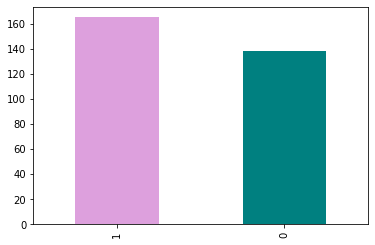

In [6]:
df["target"].value_counts().plot(kind="bar", color=["plum", "teal"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column to the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
# It appears that being a woman in this dataset comes with a 75% chance of having heart disease
# And a male has about a 45% chance to have heart disease in this dataset
72/96, 93/207

(0.75, 0.4492753623188406)

In [13]:
# There is a 55% chance of a patient having heart disease if they are in this dataset.
165/302

0.5463576158940397

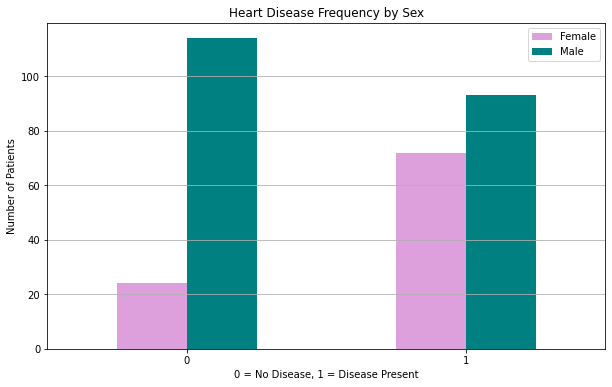

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["plum", "teal"])
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease Present")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.grid(linestyle='-', axis='y');

In [15]:
pd.crosstab(df.age, df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


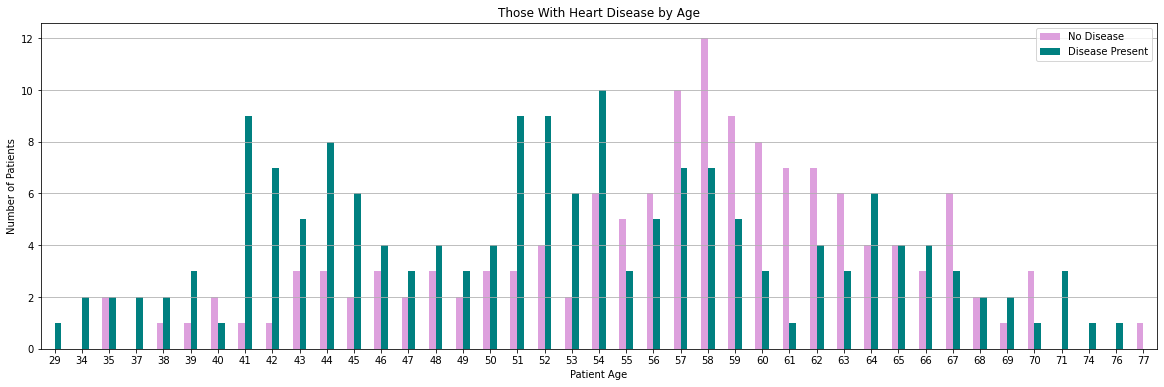

In [16]:
pd.crosstab(df.age, df.target).plot(kind="bar",
                                    figsize=(20, 6),
                                    color=["plum", "teal"])
plt.title("Those With Heart Disease by Age")
plt.xlabel("Patient Age")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease Present"])
plt.xticks(rotation=0)
plt.grid(linestyle='-', axis='y');

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

y=-1.005077x+(204.289210)


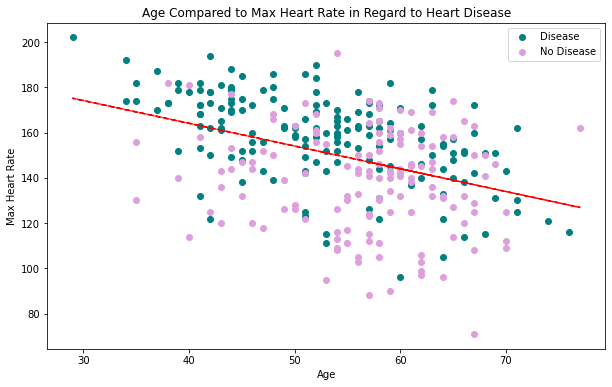

In [22]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="teal")


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="plum")

# Add some helpful info
plt.title("Age Compared to Max Heart Rate in Regard to Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Add trendline
z = np.polyfit(df.age, df.thalach, 1)
p = np.poly1d(z)
plt.plot(df.age, p(df.age), "r--")
# line equation
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

Difficult pattern to see. Looks like a general left to right downward trend.

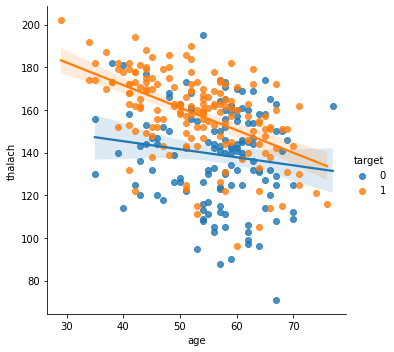

In [75]:
# A different method for a scatter plot with trendlines
g = sns.lmplot(x='age', y='thalach', hue='target', data=df)

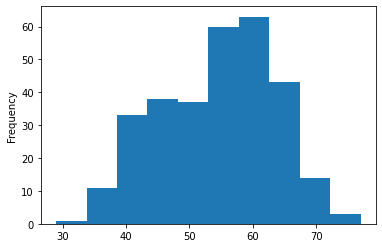

In [32]:
# Check the distribution of the age feature
df.age.plot.hist();

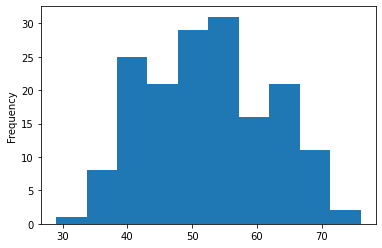

In [28]:
df.age[df.target==1].plot.hist();

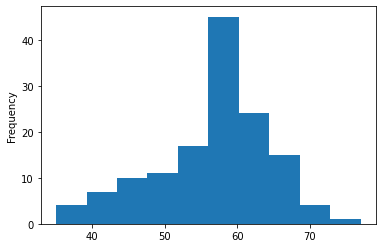

In [29]:
df.age[df.target==0].plot.hist();

There appears to be slightly skewed age group towards the right. Interesting that there is near normal distirbution of heart disease

### Heart Disease Frequency per Chest Pain Type
- 3. cp: chest pain type
    - 0: Value 0: typical angina - chest pain related decrease blood supply to the heart
    - 1: Value 1: atypical angina - chest pain not related to heart
    - 2: Value 2: non-anginal pain - typically esophageal spasms (non heart related)
    - 3: Value 3: asymptomatic - chest pain not showing signs of disease

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


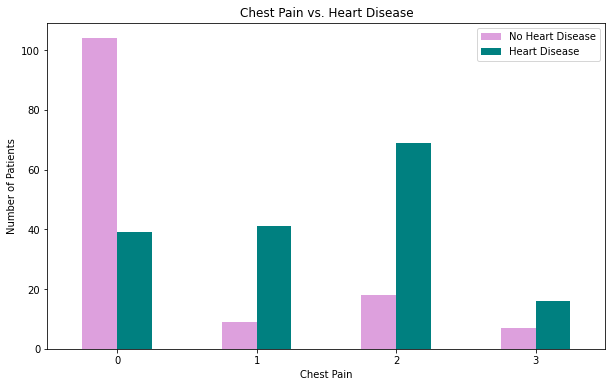

In [43]:
pd.crosstab(df.cp, df.target).plot(figsize=(10, 6),
                                   kind="bar",
                                   xlabel="Chest Pain",
                                   ylabel="Number of Patients",
                                   title="Chest Pain vs. Heart Disease",
                                   color=["plum", "teal"])
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

Interesting that the value 2 chest pain has high instances of heart disease becuase that pain is typically non heart related.

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


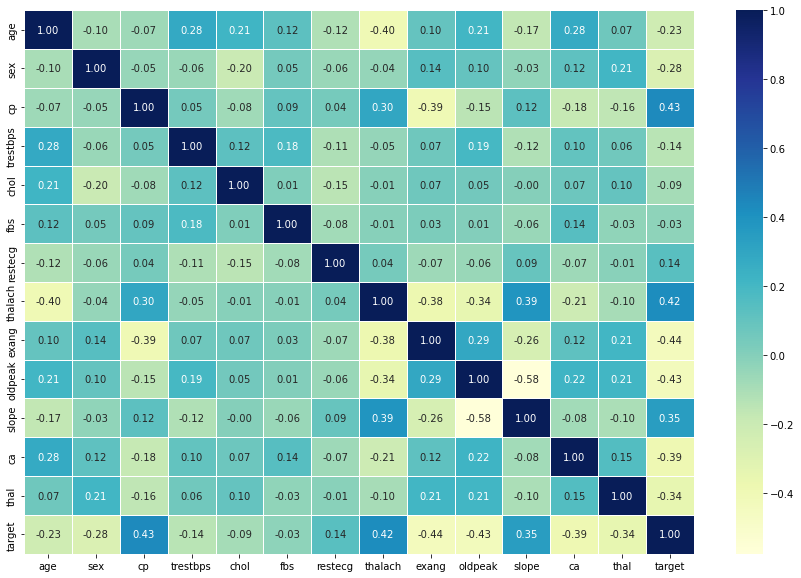

In [59]:
# Let's make it visual!
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Very bizarre that as exang goes up (pain felt with exercise) that heart disease goes down. This seems counterintuitive

## 5. Modelling

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Split our data into features, labels (Independent and Dependent Variables) -  and train and test
X = df.drop("target", axis=1)
y = df["target"]
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [77]:
# Split data into train and test sets.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Time to choose and build a model!

Since this is a classification problem we will explore the classifier models in scikit-learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I am going to try out 3 different machine learning models
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [92]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test: testing labels
    '''
    # Set random seed so that it reproducible
    np.random.seed(42)
    # Make a dicitionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [98]:
model_scores_baseline = fit_and_score(models,
                                      X_train=X_train,
                                      X_test=X_test,
                                      y_train=y_train,
                                      y_test=y_test)

/home/bily/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
model_scores_baseline

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [ ]:
### Model Comparison

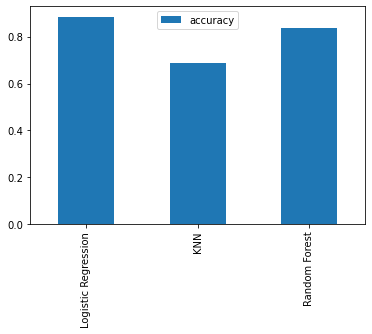

In [101]:
model_baseline_compare = pd.DataFrame(model_scores_baseline, index=["accuracy"])
model_baseline_compare.T.plot.bar();

Now I've got a decent baseline model and I know the model's first predictions aren't always the best. So let's see what is going on so that we can improve our models.

Things to do:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [111]:
# Starting with the KNN tuning

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Updat the test scores list
    test_scores.append(knn.score(X_test, y_test))
    
                        

In [112]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [113]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


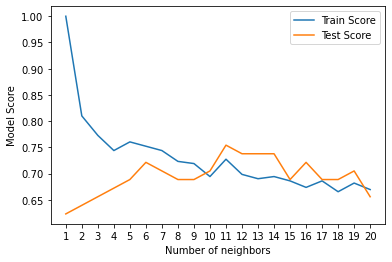

In [118]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

This is better but still not as good as the other models at baseline. So, goodbye KNearestNeighbors!

## Tuning Hyperparameters using RandomizedSearchCV on the other models

Tuning:
* LogisticRegression()
* RandomForestClassifier()

In [137]:
# Create a hyperparamter grid for LogisticRegression()
log_reg_grid = {"penalty": ["none", "l1", "l2"],
                "C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grids = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10, 20],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [152]:
# Tune LogisticRegression()

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                               verbose=True)

# Fit Random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/bily/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bily/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bily/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/bily/Desktop/heart-disease-project/

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': [None, 'l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [153]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 206.913808111479}

In [154]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Very similar to the baseline accuracy, LogisticRegression must be decent out of the box

In [155]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=(rf_grids),
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparamter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [156]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [157]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [158]:
model_scores_baseline

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Now, instead of randomly manipulating the hyperparameters let's see what GridSearchCV does to our models

In [161]:
# Setup random seed
np.random.seed(42)

# Different hyperparameters for our LogisticRegression model!
log_reg_grid_2 = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-4, 4, 30),
                 "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_2,
                          cv=5,
                          verbose=True,
                          n_jobs=-1)

# Fit grid hyperparamter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [162]:
# Check the best hyperparamters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [163]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [164]:
model_scores_baseline

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Logistic Regression did well, but hasn't met our 95% accuracy/confidence interval

In [165]:
# Now let's see how the RandomForestClassifier does with the GridSearchCV
# BEWARE this will take some time to process setup as it is

# Create a hyperparameter grid for RandomForestClassifier
rf_grids_2 = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10, 20],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

# Setup a random seed
np.random.seed(42)

# Setup grid hyperparameter search for RandomForestClassifier()
rf_gs = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grids_2,
                     cv=5,
                     n_jobs=-1,
                     verbose=True)

# Fit grid search RandomForestClassifier
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10, 20],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [166]:
rf_gs.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 10}

In [167]:
rf_gs.score(X_test, y_test)

0.8688524590163934

Not a massive improvement, and still not as accurate as the LogisticRegression()!

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and let's try to use cross-validation where possible

To make comparisons and evaluate our trained model, we first need to make predictions

For simplicity I will evaluate the LogisticRegression() classifier so I don't have to run the RandomForestClassifier() if I am in a time crunch.

In [168]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [169]:
y_preds, y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

/home/bily/Desktop/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


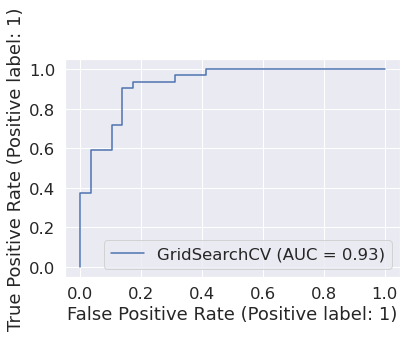

In [176]:
# Plot ROC curve and calculate AUC metrics
plot_roc_curve(gs_log_reg, X_test, y_test);

In [171]:
# Confusion matrix
print(confusion_matrixon_matrixon_matrixon_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


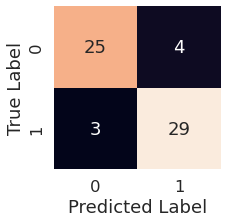

In [174]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [175]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

I am going to calculate accuracy, precision, recall, f1-score of the LogisticRegression model using cross-validation by using `cross_val_score()`

In [177]:
# Check best hyperparameters for LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [179]:
# Create a new classifier with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear',
                         penalty='l2')

In [184]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)

0.8446994535519124

In [305]:
# Creating a function to run cross validation on accuracy, precision, recall, f1-score
scoring_list = ["accuracy", "precision", "recall", "f1"]
results_cross_val = {}
def scoring_cross_val(list, clf, results_cross_val):
    for i in list:
        results_cross_val.update({i:cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                            scoring=i)})
            
    return results_cross_val

In [306]:
scoring_cross_val(scoring_list, clf, results_cross_val)

{'accuracy': array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 'precision': array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 'recall': array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 'f1': array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])}

In [307]:
# Create a dictionary of the mean averages of the cross-validated scores
cv_metrics = {}
for i in results_cross_val:
    cv_metrics.update({i: np.mean(results_cross_val[i])})
    print(f"{i} mean = {np.mean(results_cross_val[i])}")


accuracy mean = 0.8446994535519124
precision mean = 0.8207936507936507
recall mean = 0.9212121212121213
f1 mean = 0.8673007976269721


In [308]:
cv_metrics

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

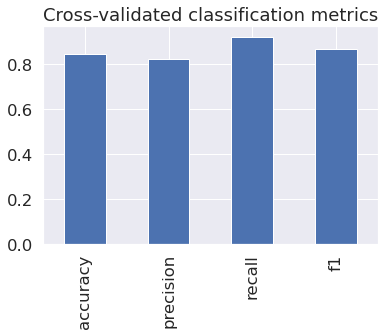

In [309]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(cv_metrics, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)


### Feature Importance

Feature importance is another way of asking which features had greater contribution to the outcome of the model. Also clues you into how they contributed

In [310]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's find the feature importance for this LogisticRegression model

In [312]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf.fit(X_train, y_train);

In [313]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [314]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

This shows which features contribute the most to our model's predictive ability.
Don't forget that this is model driven correlation, and our model runs at an 84% accuracy

<AxesSubplot:title={'center':'Feature Importance'}>

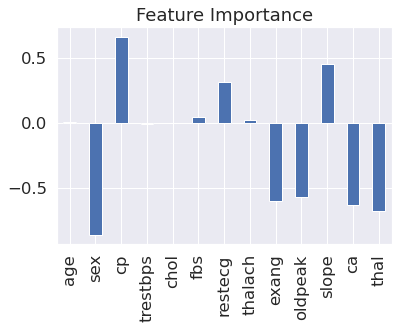

In [315]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [316]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [317]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


<AxesSubplot:xlabel='slope'>

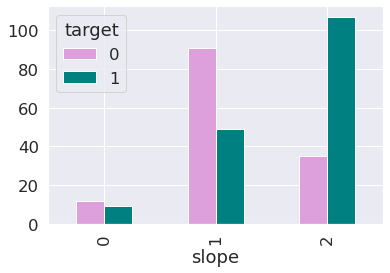

In [327]:
pd.crosstab(df["slope"], df["target"]).plot(kind="bar",
                                           color=['plum', 'teal'])

## 6. Experimentation

### This is the end of this proof of concept for this dataset.

Unfortunately we haven't hit the confidence level of 95%. So another approach would come next. 

* Could I collect more data?
* Could I try different models? Like CatBoost or XGBoost?
* Can I continue to improve the current models? Is there room/time for improvement?

In [329]:
# Saving the trained LogisticRegression() model
pickle.dump(clf, open("heart_disease_LogisticRegression_model.pkl", "wb"))